In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Metrics Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

# Models
from sklearn.cluster import KMeans                  # Modul 4
from sklearn.naive_bayes import GaussianNB          # Modul 6
from sklearn.ensemble import RandomForestClassifier # Modul 7
from sklearn.linear_model import LinearRegression   # Modul 8
from sklearn.ensemble import RandomForestRegressor  # Modul 9

In [35]:
try:
    df = pd.read_csv('Coffe_sales.csv')
    print("✅ Dataset berhasil diload!")
except FileNotFoundError:
    print("❌ File CSV tidak ditemukan.")

# Membersihkan nama kolom dari spasi tersembunyi
df.columns = df.columns.str.strip()

print(f"Dimensi Data: {df.shape}")
display(df.head())

✅ Dataset berhasil diload!
Dimensi Data: (3547, 11)


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [36]:
# Cek & Hapus Duplikat
print(f"Duplikat Awal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplikat Setelah Cleaning: {df.duplicated().sum()}")

# Konversi Tipe Data
# 'money' harus float, 'Date' harus datetime
df['money'] = df['money'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])

df.info()

Duplikat Awal: 0
Duplikat Setelah Cleaning: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 304.9+ KB


In [37]:
# Inisialisasi LabelEncoder terpisah untuk Target
le_coffee = LabelEncoder()
le_fitur = LabelEncoder() # Untuk fitur lain bisa pakai satu encoder bergantian

# 1. Encoding Target Utama (Jenis Kopi) - Simpan di le_coffee
df['coffee_name_encoded'] = le_coffee.fit_transform(df['coffee_name'])

# 2. Encoding Fitur Pendukung - Pakai le_fitur
df['cash_type_encoded'] = le_fitur.fit_transform(df['cash_type'])
df['Weekdaysort_encoded'] = le_fitur.fit_transform(df['Weekdaysort'])

# 3. Scaling
scaler = StandardScaler()
df['money_scaled'] = scaler.fit_transform(df[['money']])
df['hour_scaled'] = scaler.fit_transform(df[['hour_of_day']])

print("✅ Feature Engineering Selesai.")
print(f"Jumlah Kelas Kopi: {len(le_coffee.classes_)}")
print(f"Kelas Kopi: {le_coffee.classes_}")

✅ Feature Engineering Selesai.
Jumlah Kelas Kopi: 8
Kelas Kopi: ['Americano' 'Americano with Milk' 'Cappuccino' 'Cocoa' 'Cortado'
 'Espresso' 'Hot Chocolate' 'Latte']


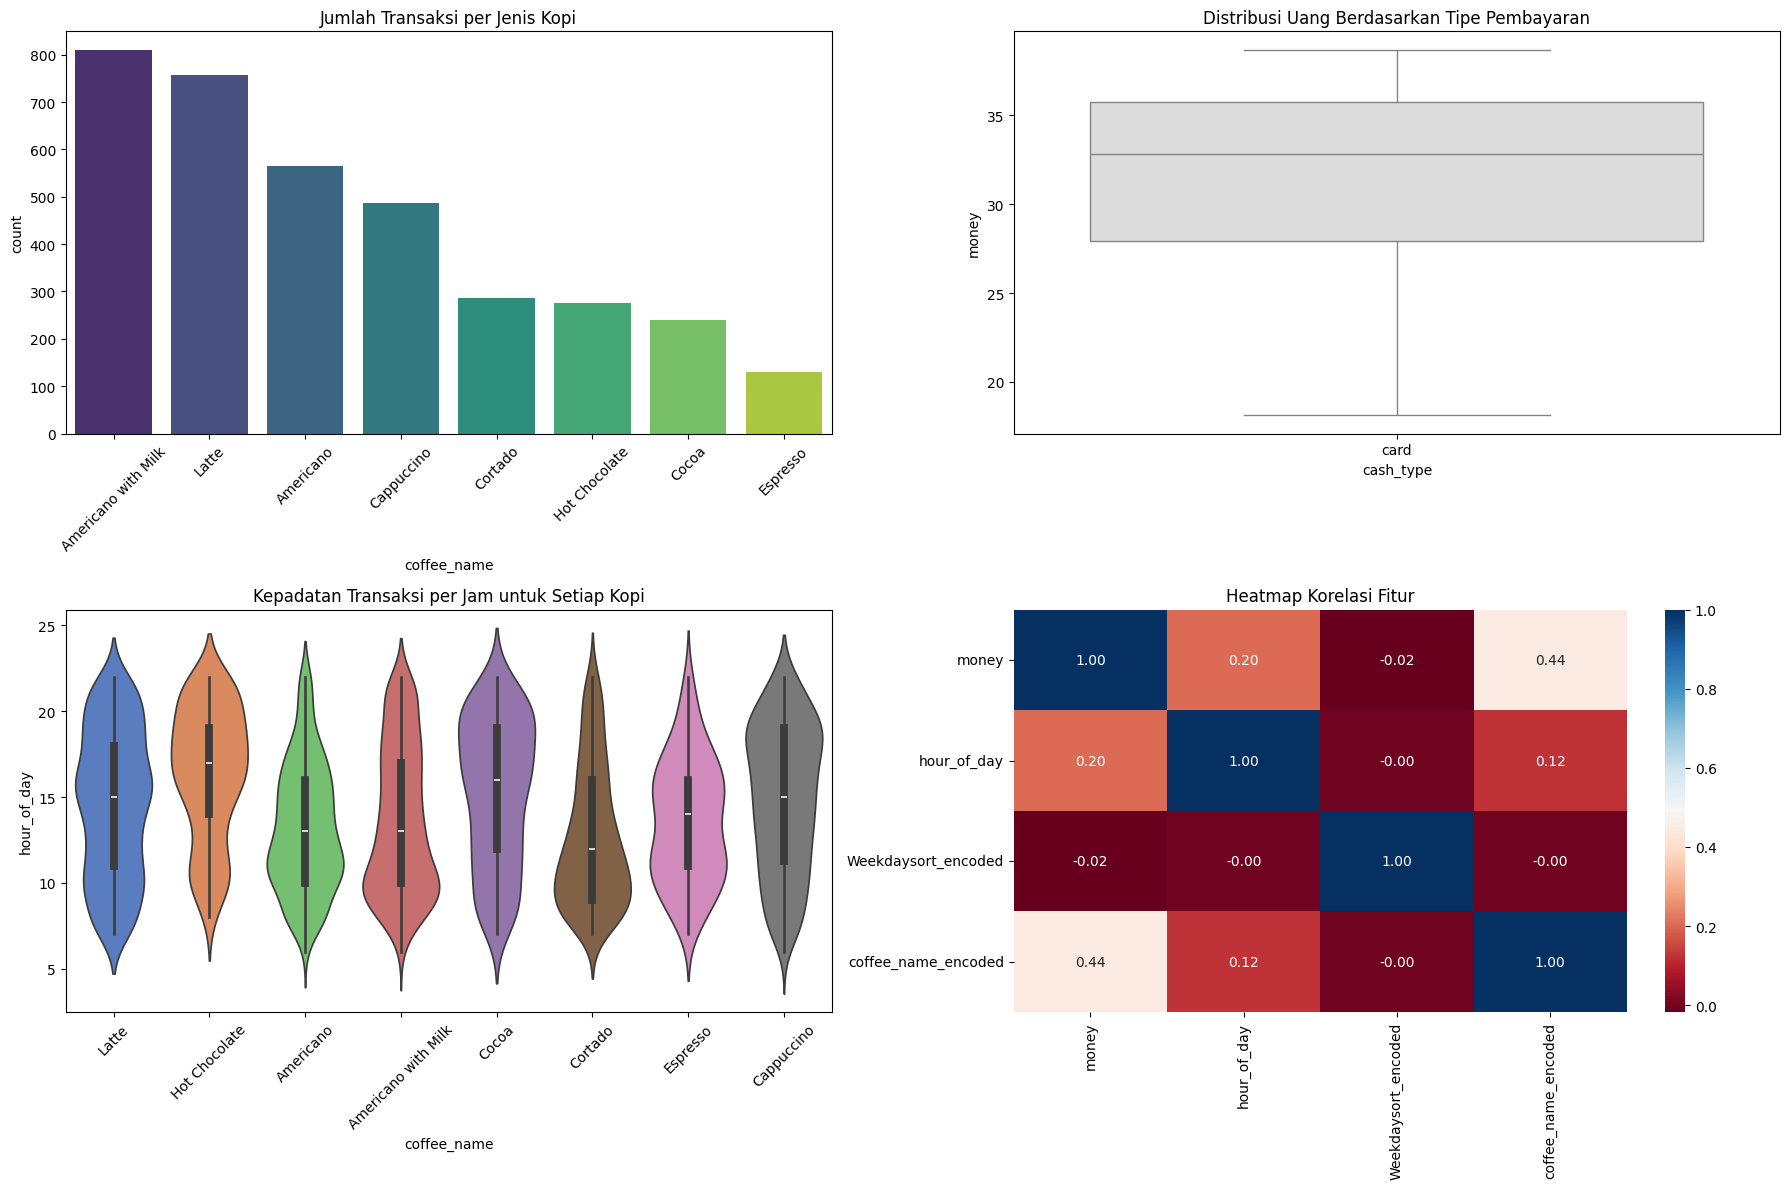

In [38]:
plt.figure(figsize=(18, 12))

# Visualisasi 1: Barplot (Distribusi Penjualan Produk)
plt.subplot(2, 2, 1)
sns.countplot(x='coffee_name', data=df, palette='viridis', order=df['coffee_name'].value_counts().index)
plt.title('Jumlah Transaksi per Jenis Kopi')
plt.xticks(rotation=45)

# Visualisasi 2: Boxplot (Mendeteksi Outlier pada Nominal Uang) - Modul 3
# Berguna untuk melihat apakah ada transaksi yang nilainya tidak wajar/sangat besar
plt.subplot(2, 2, 2)
sns.boxplot(x='cash_type', y='money', data=df, palette='coolwarm')
plt.title('Distribusi Uang Berdasarkan Tipe Pembayaran')

# Visualisasi 3: Violin Plot (Distribusi Jam Transaksi per Kopi) - Modul 3
# Berguna untuk melihat "Kapan biasanya kopi jenis X dibeli?" (Pagi/Siang/Sore)
plt.subplot(2, 2, 3)
sns.violinplot(x='coffee_name', y='hour_of_day', data=df, palette='muted')
plt.title('Kepadatan Transaksi per Jam untuk Setiap Kopi')
plt.xticks(rotation=45)

# Visualisasi 4: Heatmap (Korelasi Antar Variabel) - Modul 3
# Berguna untuk Feature Selection (melihat hubungan antar variabel angka)
plt.subplot(2, 2, 4)
numeric_cols = df[['money', 'hour_of_day', 'Weekdaysort_encoded', 'coffee_name_encoded']]
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Heatmap Korelasi Fitur')

plt.tight_layout()
plt.show()

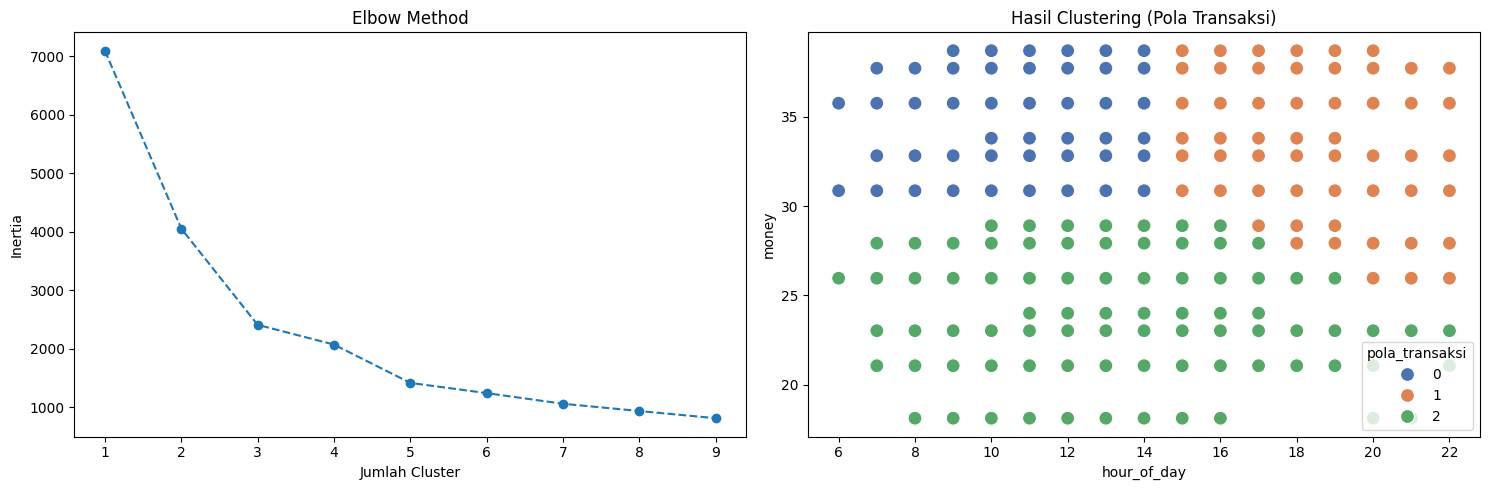

Silhouette Score (K=3): 0.4306


In [39]:
X_cluster = df[['money_scaled', 'hour_scaled']]

# Elbow Method
inertia = []
range_k = range(1, 10)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot Elbow & Scatter Hasil Cluster
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
kmeans_final = KMeans(n_clusters=3, random_state=42)
df['pola_transaksi'] = kmeans_final.fit_predict(X_cluster)
sns.scatterplot(x='hour_of_day', y='money', hue='pola_transaksi', data=df, palette='deep', s=100)
plt.title('Hasil Clustering (Pola Transaksi)')

plt.tight_layout()
plt.show()

# Evaluasi Silhouette Score
sil_score = silhouette_score(X_cluster, df['pola_transaksi'])
print(f"Silhouette Score (K=3): {sil_score:.4f}")

In [40]:
# Fitur: Uang, Jam, Tipe Bayar, Hari
X_clf = df[['money', 'hour_of_day', 'cash_type_encoded', 'Weekdaysort_encoded']]
# Target: Jenis Kopi
y_clf = df['coffee_name_encoded']

# Split Data (80% Train, 20% Test)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Model A: Naive Bayes (Modul 6)
nb = GaussianNB()
nb.fit(X_train_c, y_train_c)
y_pred_nb = nb.predict(X_test_c)

# Model B: Random Forest Classifier (Modul 7)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_rf = rf_clf.predict(X_test_c)

print("✅ Model Classification Selesai Dilatih.")

✅ Model Classification Selesai Dilatih.


--- Perbandingan Akurasi ---
Naive Bayes   : 50.14%
Random Forest : 55.35%

--- Classification Report (Random Forest) ---
                     precision    recall  f1-score   support

          Americano       0.70      0.70      0.70       128
Americano with Milk       0.78      0.82      0.80       163
         Cappuccino       0.39      0.40      0.39        90
              Cocoa       0.26      0.16      0.19        45
            Cortado       0.37      0.31      0.34        48
           Espresso       0.77      0.85      0.81        20
      Hot Chocolate       0.30      0.25      0.27        60
              Latte       0.45      0.52      0.48       156

           accuracy                           0.55       710
          macro avg       0.50      0.50      0.50       710
       weighted avg       0.54      0.55      0.55       710



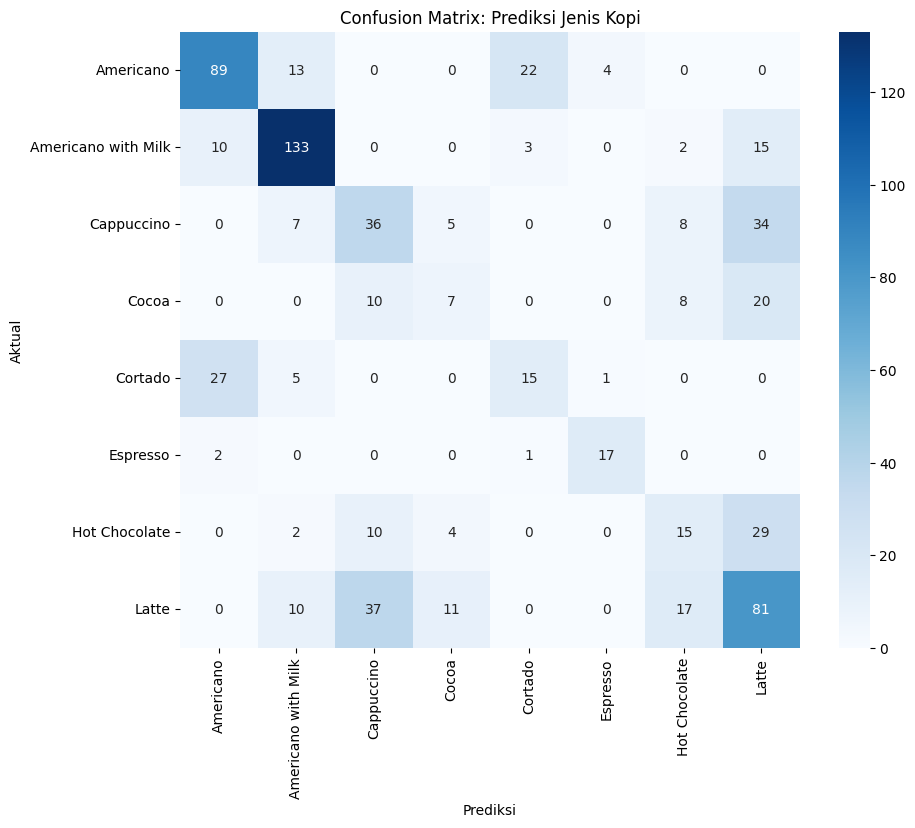

In [41]:
print("--- Perbandingan Akurasi ---")
print(f"Naive Bayes   : {accuracy_score(y_test_c, y_pred_nb)*100:.2f}%")
print(f"Random Forest : {accuracy_score(y_test_c, y_pred_rf)*100:.2f}%")

print("\n--- Classification Report (Random Forest) ---")
# FIX ERROR: Gunakan le_coffee yang menyimpan nama kopi
target_names = le_coffee.classes_.astype(str)
print(classification_report(y_test_c, y_pred_rf, target_names=target_names))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_c, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix: Prediksi Jenis Kopi')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

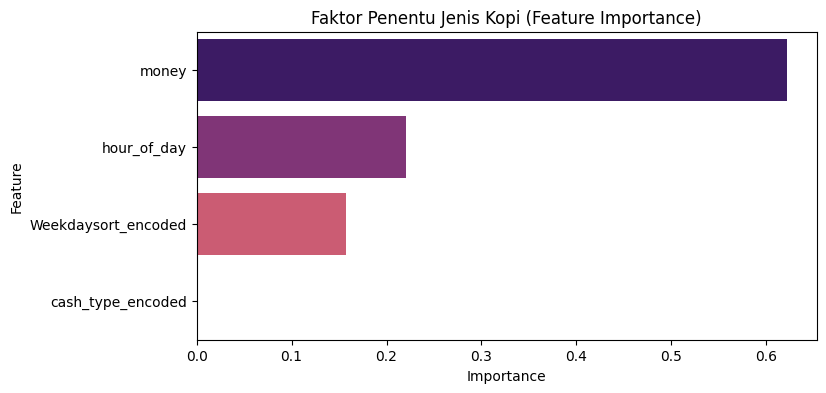

In [42]:
importances = rf_clf.feature_importances_
feat_df = pd.DataFrame({'Feature': X_clf.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='magma')
plt.title('Faktor Penentu Jenis Kopi (Feature Importance)')
plt.show()

R2 Score Linear Regression : 0.2585
R2 Score Random Forest     : 0.8350


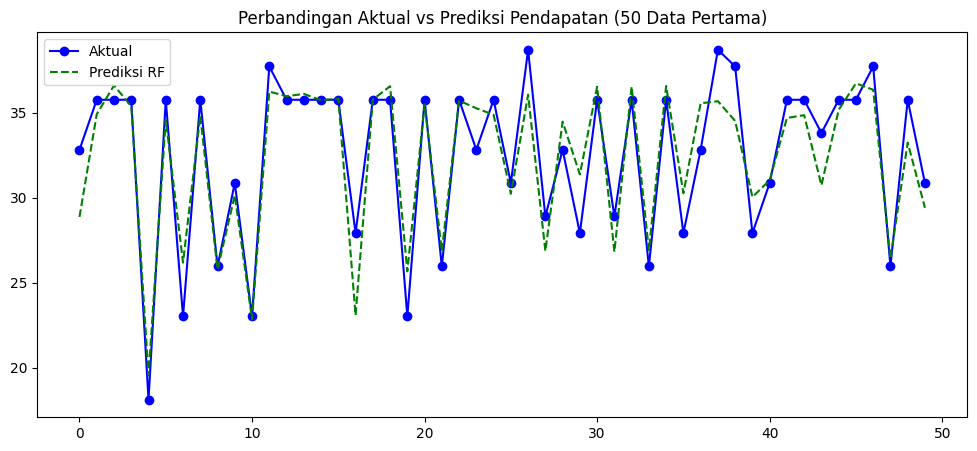

In [43]:
# Target sekarang berubah menjadi 'money' (Angka)
X_reg = df[['coffee_name_encoded', 'hour_of_day', 'cash_type_encoded', 'Weekdaysort_encoded']]
y_reg = df['money']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression (Modul 8)
lr = LinearRegression()
lr.fit(X_train_r, y_train_r)
y_pred_lr = lr.predict(X_test_r)

# Random Forest Regressor (Modul 9)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_rf_reg = rf_reg.predict(X_test_r)

# Evaluasi Regresi
print(f"R2 Score Linear Regression : {r2_score(y_test_r, y_pred_lr):.4f}")
print(f"R2 Score Random Forest     : {r2_score(y_test_r, y_pred_rf_reg):.4f}")

# Visualisasi Prediksi vs Aktual (Lineplot Modul 9)
plt.figure(figsize=(12, 5))
plt.plot(y_test_r.values[:50], label='Aktual', color='blue', marker='o')
plt.plot(y_pred_rf_reg[:50], label='Prediksi RF', color='green', linestyle='--')
plt.title('Perbandingan Aktual vs Prediksi Pendapatan (50 Data Pertama)')
plt.legend()
plt.show()

In [44]:
# Contoh: Ada transaksi sebesar $35.0, Jam 10 pagi, Cash (1), Hari Jumat (4)
# Kita ingin model menebak: Kopi apa ini?

input_baru = [[35.0, 10, 1, 4]] 

# ... (kode input baru)
# Prediksi
prediksi_idx = rf_clf.predict(input_baru)
hasil_kopi = le_coffee.inverse_transform(prediksi_idx) # Gunakan le_coffee
# ...

print("--- SIMULASI PREDIKSI ---")
print(f"Input Data: Uang=$35.0, Jam=10:00, Bayar=Cash, Hari=Jumat")
print(f"🤖 Sistem Memprediksi: Pelanggan membeli **{hasil_kopi[0]}**")

--- SIMULASI PREDIKSI ---
Input Data: Uang=$35.0, Jam=10:00, Bayar=Cash, Hari=Jumat
🤖 Sistem Memprediksi: Pelanggan membeli **Cappuccino**
